In [334]:
import math
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

In [335]:
values = (np.load("../BIO_Ml/GSE52588/GSE52588_beta_fn.npz"))["X"]
data = pd.read_csv("../BIO_Ml/GSE52588/GSE52588_samples.csv", delim_whitespace=True)

In [336]:
cpg_names = pd.read_csv("../BIO_Ml/GSE52588/cpgs_annotations.csv")
gene_names = pd.read_csv("../BIO_Ml/GSE52588/cpgs_annotations.csv")
cpg_names = cpg_names["ID_REF"]
cpg_names = cpg_names.replace(np.nan, "0")
x_cpg = pd.DataFrame(data=values, columns=cpg_names[:422802])
x_cpg["Age"] = data["age"]
x_cpg["Gene_Name"] = gene_names["UCSC_REFGENE_NAME"]

In [337]:
y = x_cpg["Age"]
#y = y.to_numpy()
X = x_cpg.drop(["Age", "Gene_Name"], axis=1)

#X = Normalizer().fit_transform(X)

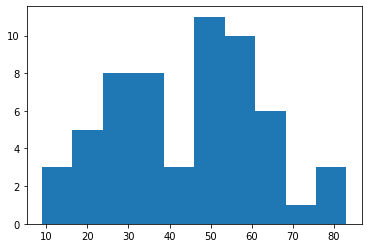

In [338]:
y = y[29:]
X = X[29:]
plt.hist(y)
plt.show()

In [339]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector_k = SelectKBest(score_func=f_regression, k=50)
fit = selector_k.fit(X, y)
cols = selector_k.get_support(indices=True)
X = X.iloc[:, cols]
#X = fit.transform(X)

In [340]:
feature = 12
ox = y
oy = X.iloc[:, feature]

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


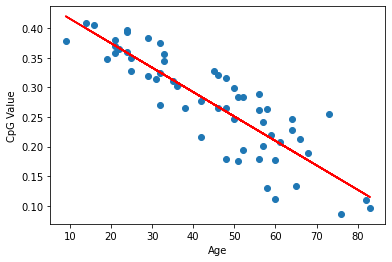

In [341]:
fig2 = plt.figure()
ax = plt.axes()
ax.plot(ox, oy, 'o')
m, b = np.polyfit(ox, oy, 1)

ax.plot(ox, m * ox + b, c="r")
ax.plot(ox, m * ox + b, c="r")

plt.xlabel("Age")
plt.ylabel("CpG Value")

fig2.show()

In [342]:
#for i in range(10):
#    oy = X.iloc[:, i]
#    fig = plt.figure()
#    ax = plt.axes()
#    ax.scatter(ox,oy)
#    fig.show

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


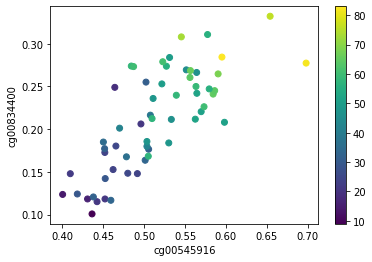

In [343]:
fig3 = plt.figure()
ax = plt.axes()
cpg1 = X.iloc[:, 0]
cpg2 = X.iloc[:, 1]

image = ax.scatter(cpg1, cpg2, c=y)
fig3.colorbar(image, ax=ax)
df_columns = X.columns

plt.xlabel(df_columns[0])
plt.ylabel(df_columns[1])

fig3.show()

In [358]:
gene_names = pd.read_csv("../BIO_Ml/GSE52588/cpgs_annotations.csv")
gene_names = gene_names[["ID_REF", "UCSC_REFGENE_NAME"]]
gene_names = gene_names.replace(np.nan, "0")

important_cpgs = list(X.columns)
gene_names = gene_names[gene_names["ID_REF"].isin(important_cpgs)]
gene_names = gene_names.drop(gene_names[gene_names["UCSC_REFGENE_NAME"] == "0"].index).drop_duplicates()
gene_names = gene_names["UCSC_REFGENE_NAME"].drop_duplicates()

for i in range(len(gene_names)):
    gene_names.iloc[i] = set(gene_names.iloc[i].split(";"))

gene_names = gene_names.reset_index()
gene_names = gene_names["UCSC_REFGENE_NAME"]
print(gene_names)
gene_names.to_excel("gene_names_CpG_based.xlsx", index = False)

0                     {HSF5}
1                    {CTDP1}
2                   {CEP164}
3                      {FST}
4                    {TMUB1}
5                   {FAM49B}
6                   {FN3KRP}
7                   {ZNF793}
8                    {MT1DP}
9                     {ERN2}
10                  {CLEC2L}
11                    {SELS}
12                    {TCF7}
13    {MIR431, RTL1, MIR433}
14                   {GPR85}
15                    {TLR5}
16                   {HOXA4}
17                    {SYT8}
18                   {UCHL1}
19                    {HRH2}
20                {TMEM132B}
21                  {ZNF799}
22                    {INF2}
23        {SNORD48, C6orf48}
24                  {SH3D19}
25                  {PTPRN2}
26                   {FKBP8}
27                 {EFCAB4A}
28                 {UBE2QP1}
29                   {ZWINT}
30                     {WIZ}
31                    {HELZ}
32                {ATP6V1C2}
33                   {LYPD1}
34            

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev

#regressor = RandomForestRegressor(n_estimators=42, criterion="absolute_error", random_state=42)
regressor = SVR(kernel="poly", C=1.5)
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    regressor.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(regressor.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified) * 100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified) * 100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified) * 100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.hist(y_train, color='g')
plt.xlabel("Age")
plt.ylabel("Number of objects")
plt.show()
plt.hist(y_test, color="r")
plt.xlabel("Age")
plt.ylabel("Number of objects")
plt.show()

In [ ]:
regressor = SVR(kernel="poly", C=1.5)
model = regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
res = pd.DataFrame({"Actual": y_test, "Predicted": y_pred,
                    "AE": y_test - y_pred,
                    "SE": (y_test - y_pred) ** 2})
print("MAE: ", mean_absolute_error(y_test, y_pred), "MSE: ", mean_squared_error(y_test, y_pred))
print(res)

In [ ]:
import shap

X_train_summary = shap.kmeans(X_train, 10)
ex = shap.KernelExplainer(regressor.predict, X_train_summary)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
fig4 = plt.figure()
ax = plt.axes()

plt.plot(y_pred, ".", c="r")
plt.plot(y_test, "o", c="b", alpha=0.3)
plt.xlabel("Object")
plt.ylabel("Age")

fig4.show()

In [ ]:
# Посмотреть аномалии +
# Нарисовать топ-n CpG +
# Проекция CpG на плоскость +
## Стрим (проекция на сложное пространство) -
# SHAP +
